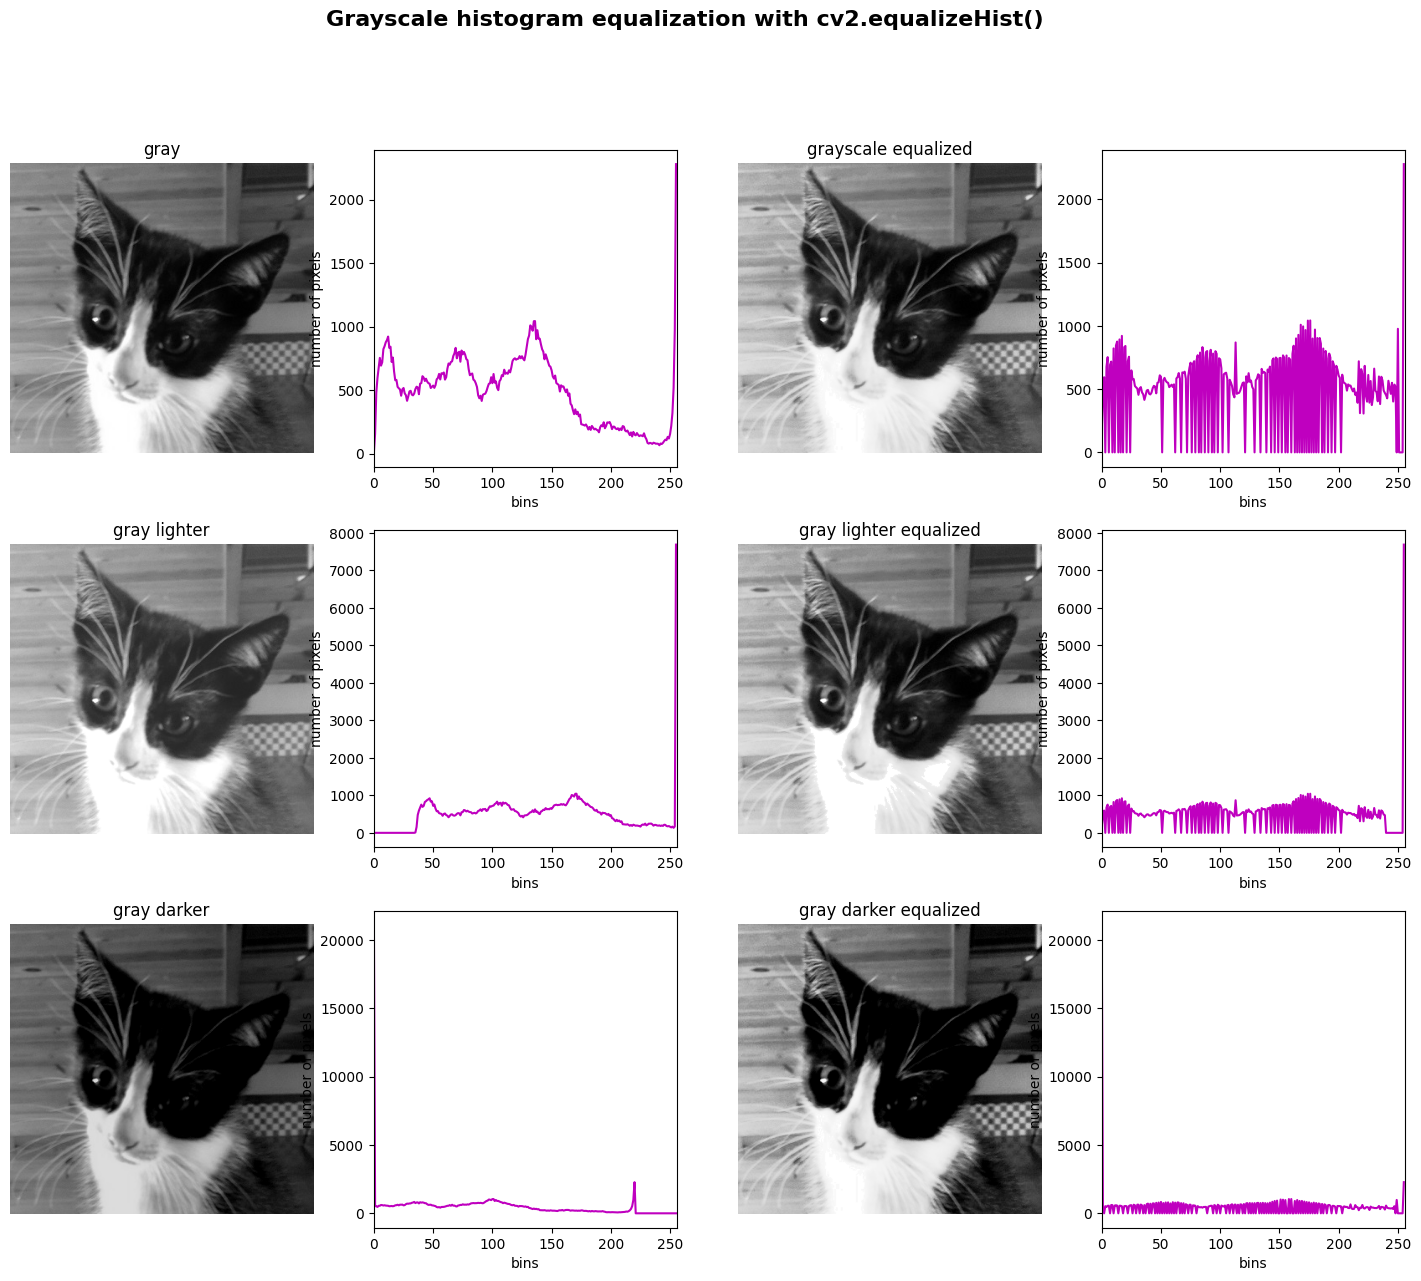

In [2]:
# menambahkan pustaka yang dibutuhkan
import numpy as np
import cv2
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):

    # konversi BGR ke RGB
    # pustaka matplotlib hanya bisa menampilkan format data gambar RGB 
    # matplotlib digunakan agar bisa menampilkan banyak gambar dalam 1 jendela
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 4, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def show_hist_with_matplotlib_gray(hist, title, pos, color):

    ax = plt.subplot(3, 4, pos)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])
    plt.plot(hist, color=color)


# membuat jendela untuk gambar histogram
plt.figure(figsize=(18, 14))
plt.suptitle("Grayscale histogram equalization with cv2.equalizeHist()", fontsize=16, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('cat-face.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# menghitung histogram dengan fungsi cv2.calcHist()
# argumen pertama adalah gambar yang diproses
# argumen kedua adalah nomor index kanal histogram
# argumen ketiga adalah mask untuk histogram
# argumen keempat adalah jumlah daftar nilai pixel yang ditampilkan pada sumbu x
# argumen kelima adalah range nilai piksel pada sumbu x
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Equalisasi gambar dan menghitung ulang histogram gambar asli
gray_image_eq = cv2.equalizeHist(gray_image)
hist_eq = cv2.calcHist([gray_image_eq], [0], None, [256], [0, 256])


# menambahkan tiap nilai piksel pada gambar dengan nilai 35 untuk membuat jenis gambar lain yang lebih terang
M = np.ones(gray_image.shape, dtype="uint8") * 35
added_image = cv2.add(gray_image, M)
hist_added_image = cv2.calcHist([added_image], [0], None, [256], [0, 256])

# Equalisasi gambar dan menghitung ulang histogram gambar yang lebih terang
added_image_eq = cv2.equalizeHist(added_image)
hist_eq_added_image = cv2.calcHist([added_image_eq], [0], None, [256], [0, 256])

# mengurangi tiap nilai piksel pada gambar dengan nilai 35 untuk membuat jenis gambar lain yang lebih gelap
subtracted_image = cv2.subtract(gray_image, M)
hist_subtracted_image = cv2.calcHist([subtracted_image], [0], None, [256], [0, 256])

# Equalisasi gambar dan menghitung ulang histogram gambar yang lebih gelap
subtracted_image_eq = cv2.equalizeHist(subtracted_image)
hist_eq_subtracted_image = cv2.calcHist([subtracted_image_eq], [0], None, [256], [0, 256])

# memunculkan gambar dan grafik histogram (tanpa equalisasi atau perbaikan):
show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_hist_with_matplotlib_gray(hist, "grayscale histogram", 2, 'm')
show_img_with_matplotlib(cv2.cvtColor(added_image, cv2.COLOR_GRAY2BGR), "gray lighter", 5)
show_hist_with_matplotlib_gray(hist_added_image, "grayscale histogram", 6, 'm')
show_img_with_matplotlib(cv2.cvtColor(subtracted_image, cv2.COLOR_GRAY2BGR), "gray darker", 9)
show_hist_with_matplotlib_gray(hist_subtracted_image, "grayscale histogram", 10, 'm')

# memunculkan gambar dan grafik histogram (dengan equalisasi atau perbaikan):
show_img_with_matplotlib(cv2.cvtColor(gray_image_eq, cv2.COLOR_GRAY2BGR), "grayscale equalized", 3)
show_hist_with_matplotlib_gray(hist_eq, "grayscale equalized histogram", 4, 'm')
show_img_with_matplotlib(cv2.cvtColor(added_image_eq, cv2.COLOR_GRAY2BGR), "gray lighter equalized", 7)
show_hist_with_matplotlib_gray(hist_eq_added_image, "grayscale equalized histogram", 8, 'm')
show_img_with_matplotlib(cv2.cvtColor(subtracted_image_eq, cv2.COLOR_GRAY2BGR), "gray darker equalized", 11)
show_hist_with_matplotlib_gray(hist_eq_subtracted_image, "grayscale equalized histogram", 12, 'm')

# menunjukan jendela hasil 
plt.show()

